# ***Human Activity Recognition Using Sensor Data***

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display, clear_output


In [2]:
import zipfile
import urllib.request
import os

# Step 1: Download and extract the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
dataset_path = 'UCI_HAR_Dataset.zip'

# Download the dataset
urllib.request.urlretrieve(url, dataset_path)

# Unzip the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall()

# Verify the contents of the extracted folder
extracted_folder = 'UCI HAR Dataset/'
print(os.listdir(extracted_folder))


['train', 'README.txt', 'activity_labels.txt', '.DS_Store', 'features.txt', 'features_info.txt', 'test']


In [3]:
# Load feature names
features = pd.read_csv(extracted_folder + 'features.txt', delim_whitespace=True, header=None, names=['index', 'feature'])
feature_names = features['feature'].values

# Make feature names unique by appending indices to duplicates
_, unique_indices = np.unique(feature_names, return_index=True)
if len(unique_indices) < len(feature_names):  # Check for duplicates
    feature_names = [f"{name}_{i}" if list(feature_names).count(name) > 1 else name
                     for i, name in enumerate(feature_names)]

# Load training data using the modified feature names
X_train = pd.read_csv(extracted_folder + 'train/X_train.txt', delim_whitespace=True, header=None, names=feature_names)
y_train = pd.read_csv(extracted_folder + 'train/y_train.txt', delim_whitespace=True, header=None, names=['Activity'])

# Load test data
X_test = pd.read_csv(extracted_folder + 'test/X_test.txt', delim_whitespace=True, header=None, names=feature_names)
y_test = pd.read_csv(extracted_folder + 'test/y_test.txt', delim_whitespace=True, header=None, names=['Activity'])

# Combine training and test datasets
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

# Show the shape of the data
print("Feature data shape:", X.shape)
print("Labels data shape:", y.shape)


Feature data shape: (10299, 561)
Labels data shape: (10299, 1)


In [4]:
from sklearn.preprocessing import StandardScaler

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


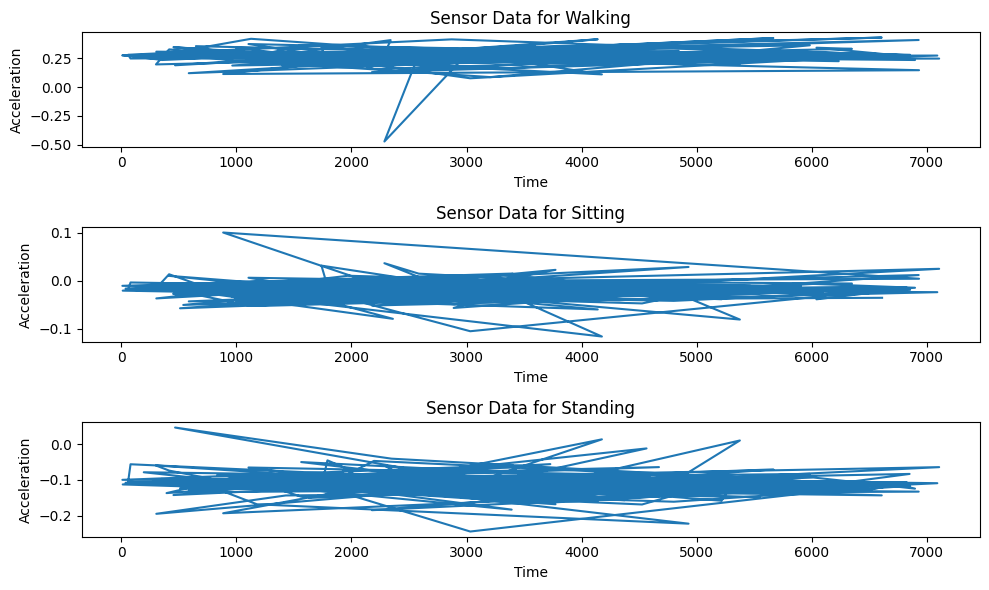

In [5]:
# Plot sensor data for walking, sitting, and standing
plt.figure(figsize=(10, 6))

# Plot time-series data for 'Walking'
plt.subplot(3, 1, 1)
plt.plot(X_train.iloc[:200, 0], label='Walking Sensor Data')
plt.title('Sensor Data for Walking')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# Plot time-series data for 'Sitting'
plt.subplot(3, 1, 2)
plt.plot(X_train.iloc[:200, 1], label='Sitting Sensor Data')
plt.title('Sensor Data for Sitting')
plt.xlabel('Time')
plt.ylabel('Acceleration')

# Plot time-series data for 'Standing'
plt.subplot(3, 1, 3)
plt.plot(X_train.iloc[:200, 2], label='Standing Sensor Data')
plt.title('Sensor Data for Standing')
plt.xlabel('Time')
plt.ylabel('Acceleration')

plt.tight_layout()
plt.show()


In [6]:
# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           1       0.99      0.99      0.99       369
           2       0.97      0.99      0.98       270
           3       0.99      0.96      0.98       284
           4       0.97      0.95      0.96       377
           5       0.95      0.96      0.96       354
           6       1.00      1.00      1.00       406

    accuracy                           0.98      2060
   macro avg       0.98      0.98      0.98      2060
weighted avg       0.98      0.98      0.98      2060



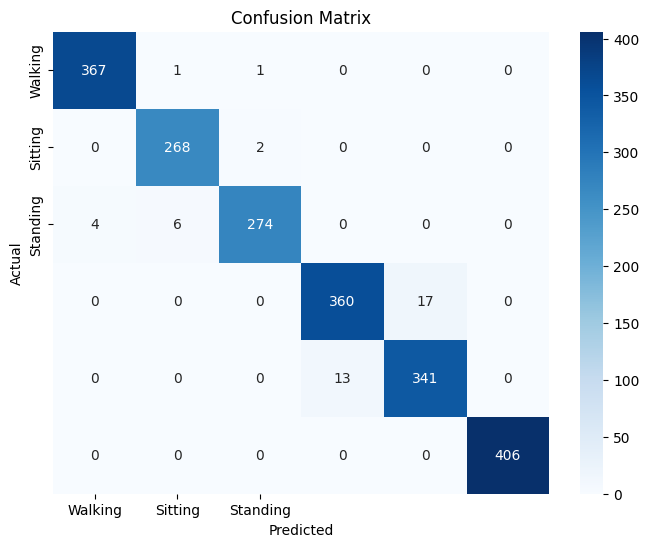

In [7]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Walking', 'Sitting', 'Standing'],
            yticklabels=['Walking', 'Sitting', 'Standing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


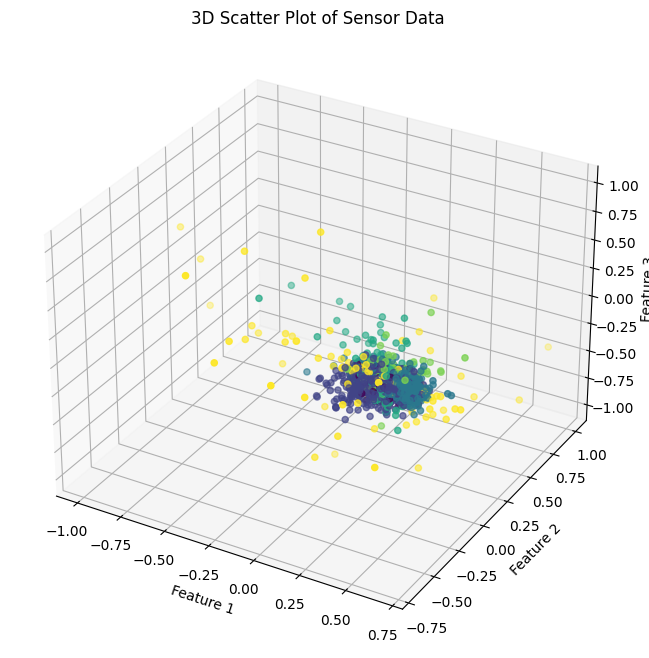

In [8]:
# Visualize the data in 3D for first three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], X_train.iloc[:, 2], c=y_train, cmap='viridis')
ax.set_title('3D Scatter Plot of Sensor Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


In [9]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, HTML
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')  # Suppress warnings for clean UI

# Load activity labels
activity_labels = pd.read_csv(extracted_folder + 'activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity'])
activity_dict = dict(zip(activity_labels['id'], activity_labels['activity']))

# Define a function to take in user input and predict activity
def predict_activity(sensor_acc_x, sensor_acc_y, sensor_gyro_z):
    # Create a default input array with the same number of features (561)
    default_input = np.zeros((1, 561))

    # Modify specific sensor values (adjust these indices as needed)
    default_input[0, 0] = sensor_acc_x  # Accelerometer X-axis
    default_input[0, 1] = sensor_acc_y  # Accelerometer Y-axis
    default_input[0, 2] = sensor_gyro_z  # Gyroscope Z-axis

    # Scale the input data
    input_scaled = scaler.transform(default_input)

    # Predict activity
    prediction = clf.predict(input_scaled)
    prediction_proba = clf.predict_proba(input_scaled)

    # Map the predicted number to the activity label
    predicted_activity = activity_dict[prediction[0]]

    # Clear the previous output and plot the prediction probabilities
    output.clear_output(wait=True)  # Clear the plot output only
    with output:
        plt.figure(figsize=(8, 6))
        sns.barplot(x=list(activity_dict.values()), y=prediction_proba[0], palette='cool')
        plt.xticks(rotation=45)
        plt.title(f"Prediction: {predicted_activity}", color='white', fontsize=18)
        plt.ylabel('Probability', color='white', fontsize=14)
        plt.gca().set_facecolor('black')
        plt.show()

    # Display prediction text below the plot
    predicted_label.value = f"<b>Predicted Activity: {predicted_activity}</b>"

# Creating sliders for real-time user input
sensor_acc_x_slider = widgets.FloatSlider(min=-1, max=1, step=0.01, description='Acc X-axis', style={'description_width': 'initial'}, layout=widgets.Layout(width='300px'))
sensor_acc_y_slider = widgets.FloatSlider(min=-1, max=1, step=0.01, description='Acc Y-axis', style={'description_width': 'initial'}, layout=widgets.Layout(width='300px'))
sensor_gyro_z_slider = widgets.FloatSlider(min=-1, max=1, step=0.01, description='Gyro Z-axis', style={'description_width': 'initial'}, layout=widgets.Layout(width='300px'))

# Create a button to trigger the prediction
predict_button = widgets.Button(description='Predict Activity', button_style='info', layout=widgets.Layout(width='300px'))

# Output area for plot and prediction
output = widgets.Output()

# Display the predicted activity label
predicted_label = widgets.HTML(value="<b>Predicted Activity: </b>")

# Custom CSS for the dark glowing theme
custom_css = """
<style>
    .widget-label {
        color: #00FFCC !important;
        font-size: 16px;
    }
    .widget-slider {
        background-color: #000000 !important;
        border-radius: 10px;
        color: #00FFCC;
        box-shadow: 0px 0px 5px #00FFCC;
    }
    .widget-button {
        background-color: #00FF00 !important;
        color: black !important;
        font-size: 16px !important;
        border-radius: 10px;
        padding: 1px;
    }
    .widget-box {
        background-color: #000000 !important;
        box-shadow: 0px 0px 20px #0055FF;
        padding: 15px;
        border-radius: 15px;
    }
    .widget-output {
        background-color: #000000 !important;
        color: #00FFCC;
    }
    body {
        background-color: #000000 !important;
    }
</style>
"""

# Arrange sliders, buttons, and plot in separate columns
left_column = widgets.VBox([sensor_acc_x_slider, sensor_acc_y_slider, sensor_gyro_z_slider, predict_button])
right_column = widgets.VBox([output, predicted_label])

# Horizontal layout with two columns
ui_elements = widgets.HBox([left_column, right_column], layout=widgets.Layout(justify_content='space-around'))

# Display the title in bold and center it
title = widgets.HTML("<h1 style='color:white; text-align:center;bottom-padding:2px'>Real-Time Human Activity Recognition</h1>")

# Create a signature
signature = widgets.HTML("<h4 style='color:lightgray; text-align:right;'>Created by AI Innovators</h4>")

# Display all widgets together in a centered layout
layout = widgets.VBox([title, ui_elements, signature])

# Link the button click to the prediction function
predict_button.on_click(lambda b: predict_activity(sensor_acc_x_slider.value, sensor_acc_y_slider.value, sensor_gyro_z_slider.value))

# Display the custom CSS for dark glowing theme
display(HTML(custom_css))

# Display the layout
display(layout)


# **HAPPY COADING**